In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/airbnb/airbnb.csv')

In [5]:
df.shape

(48895, 16)

There are 48895 rows and 16 columns

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Categorical and numeric data

In [7]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
cat_cols = df.select_dtypes(include = 'object').columns.to_list()
print(cat_cols)
num_cols = df.select_dtypes(exclude = 'object').columns.to_list()
print(num_cols)

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


### Handling null values

In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df['name'].fillna('unknown', inplace = True)
df['host_name'].fillna('unknown', inplace = True)

In [11]:
df.drop('last_review', axis = 1, inplace = True)

In [12]:
df['reviews_per_month'].fillna(0, inplace = True)

Now the dataset has no null value

### Handling duplicate values

In [13]:
df.duplicated().sum()

0

Luckily there are no duplicate values

In [14]:
df.shape

(48895, 15)

name is irrlevant we can drop that also

In [15]:
df.drop('name', axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

host_name is irrelevant

In [17]:
df.drop('host_name', axis = 1, inplace = True)

In [18]:
df['neighbourhood_group'].nunique()

5

In [19]:
df['neighbourhood'].nunique()

221

In [20]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Neighbourhood vs price

In [21]:
r1 = df.groupby('neighbourhood_group')['price'].mean().reset_index()
r1

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


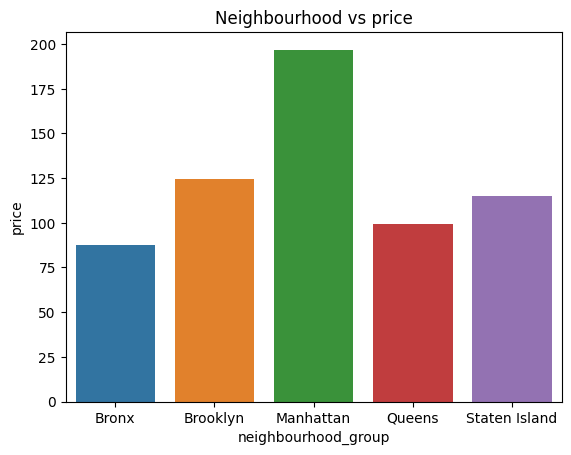

In [22]:
sns.barplot(data = r1, x = 'neighbourhood_group', y = 'price')
plt.title('Neighbourhood vs price')
plt.show()

Wr can easily conclude that manhattan neighbourhood is most expensive where averahe airbnb price is $124

Lets examine the price distribution in general

price is numberic column

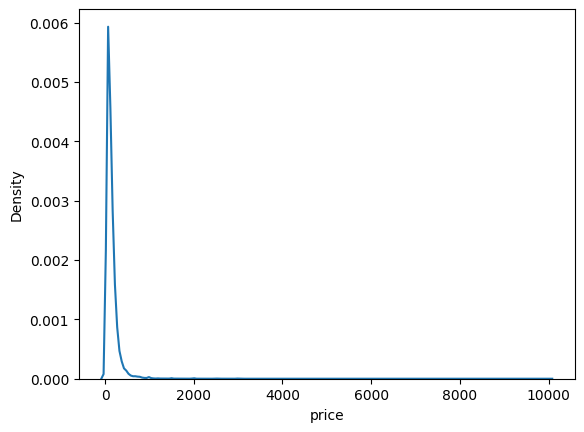

In [23]:
sns.kdeplot(df['price'])
plt.show()

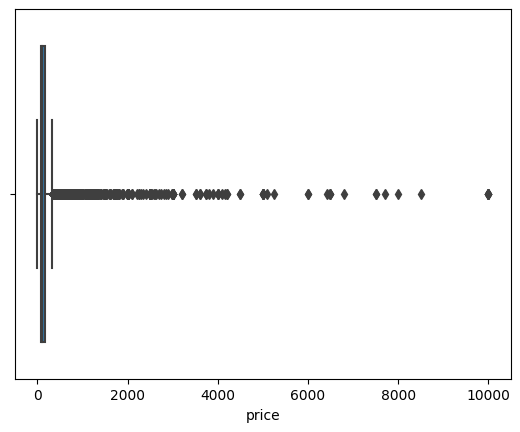

In [24]:
sns.boxplot(data = df, x = 'price')
plt.show()

from kde plot and box plot we can easily conclude that there are outliers in data

In [25]:
price_q1 = df['price'].quantile(0.25)
price_q3 = df['price'].quantile(0.75)
price_iqr = price_q3 - price_q1

In [26]:
price_upper_max = price_q3 + 1.5 * price_iqr
print(price_upper_max)

334.0


Number of listings hiving prices greated than price_upper_max

In [27]:
df[df['price'] > price_upper_max].count()

id                                2972
host_id                           2972
neighbourhood_group               2972
neighbourhood                     2972
latitude                          2972
longitude                         2972
room_type                         2972
price                             2972
minimum_nights                    2972
number_of_reviews                 2972
reviews_per_month                 2972
calculated_host_listings_count    2972
availability_365                  2972
dtype: int64

lets ignore these rows

In [28]:
df = df[df['price'] < price_upper_max]

In [29]:
df.shape # before = 48895, 12

(45918, 13)

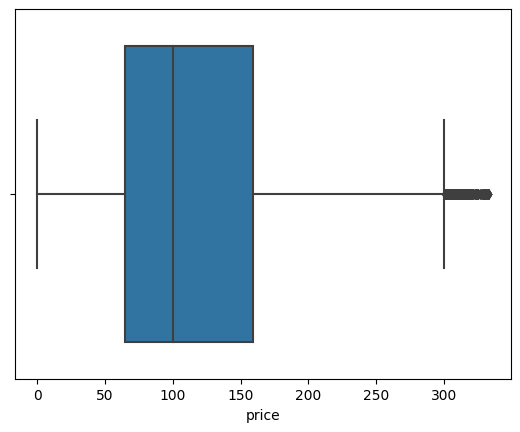

In [30]:
sns.boxplot(data = df, x = 'price')
plt.show()

We have significantly reduced outliers

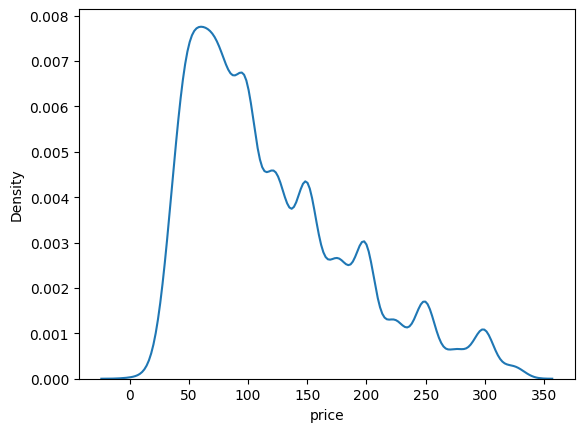

In [31]:
sns.kdeplot(data = df, x = 'price')
plt.show()

Number of properties in each neighbourhood

In [32]:
r2 = df.groupby('neighbourhood_group')['host_id'].count().reset_index()
r2

,neighbourhood_group,host_id
0,Bronx,1070
1,Brooklyn,19415
2,Manhattan,19501
3,Queens,5567
4,Staten Island,365


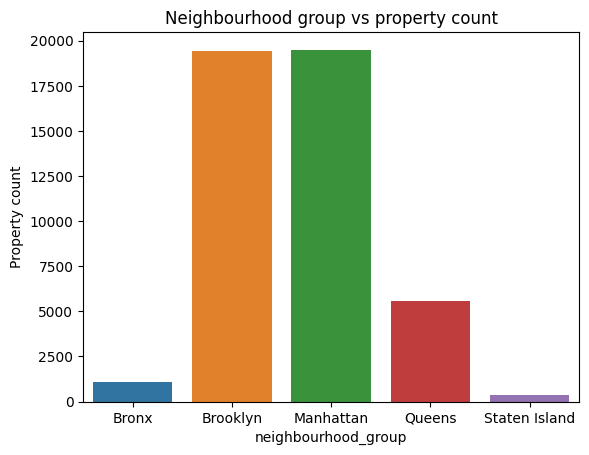

In [33]:
sns.barplot(data = r2, x = 'neighbourhood_group', y = 'host_id')
plt.title('Neighbourhood group vs property count')
plt.ylabel('Property count')
plt.show()

Clearly Brooklyn and Manhattan has most number of listings

In [34]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


question???

In [35]:
df['id'].nunique()

45918

In [36]:
df['host_id'].nunique()

35388

clearly some hosts are having more than one listring

In [37]:
r4 = df.groupby('host_id')['id'].count().reset_index()
r4.columns = ['host', 'number_of_properties']
r4.head()

,host,number_of_properties
0,2438,1
1,2571,1
2,2787,6
3,2845,2
4,2868,1


top 10 hosts having most number of lisings

In [38]:
r5 = r4['number_of_properties'].sort_values(ascending = False).head(10).reset_index()
r5.columns = ['host', 'number_of_listings']

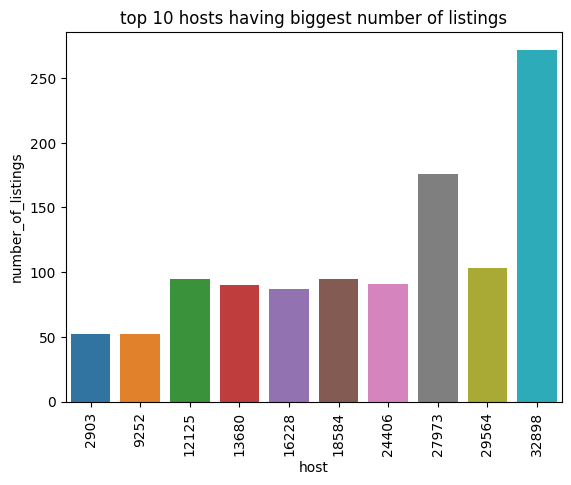

In [39]:
sns.barplot(data = r5, x = 'host', y = 'number_of_listings')
plt.title('top 10 hosts having biggest number of listings')
plt.xticks(rotation = 90)
plt.show()

analysing room types

In [40]:
df['room_type'].value_counts()

Entire home/apt    22784
Private room       21996
Shared room         1138
Name: room_type, dtype: int64

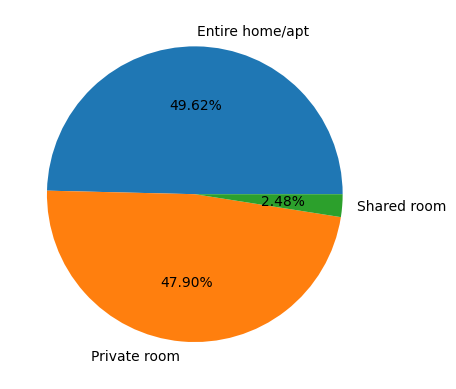

In [41]:
plt.pie(df['room_type'].value_counts(), labels = df['room_type'].value_counts().index, autopct = '%.2f%%')
plt.show()

Observation <br>
Most rooms are either home/apt or private room<br>
Shared rooms are very rare

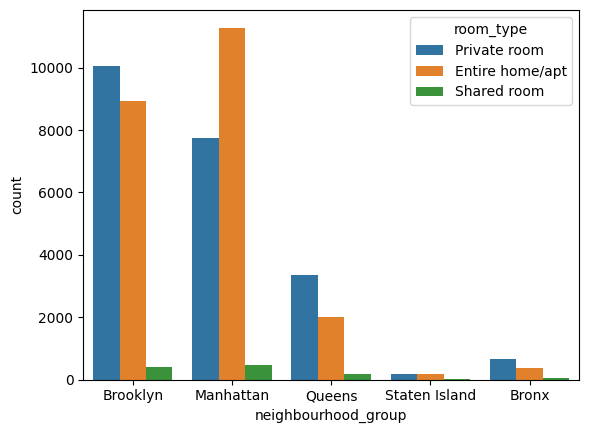

In [42]:
sns.countplot(data = df, x = 'neighbourhood_group', hue = 'room_type')
plt.show()

Analysing stay requiremnts

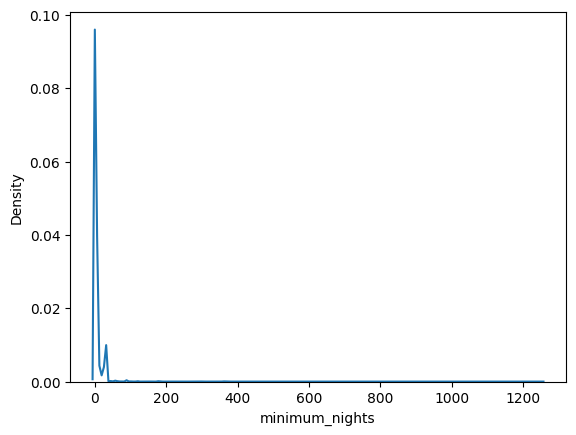

In [43]:
sns.kdeplot(df['minimum_nights'])
plt.show()

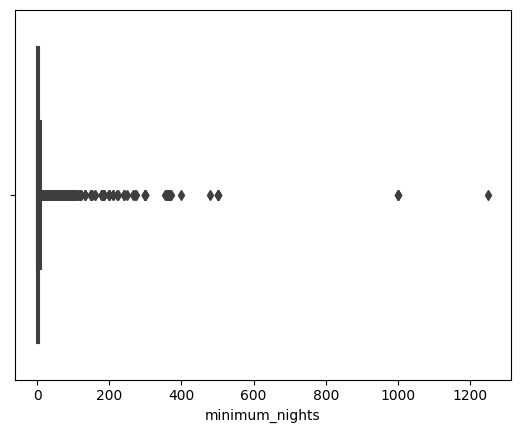

In [44]:
sns.boxplot(x = df['minimum_nights'])
plt.show()

There are many outliers in the columns

In [45]:
mn_q1 = df['minimum_nights'].quantile(0.25)
mn_q3 = df['minimum_nights'].quantile(0.75)
mn_iqr = mn_q3 - mn_q1
max_mn_limit = mn_q3 + 1.5 * mn_iqr

In [46]:
print(max_mn_limit)

11.0


droping outliers

In [47]:
df = df[df['minimum_nights'] < max_mn_limit]

In [48]:
df.shape # before = 45918, 13

(39707, 13)

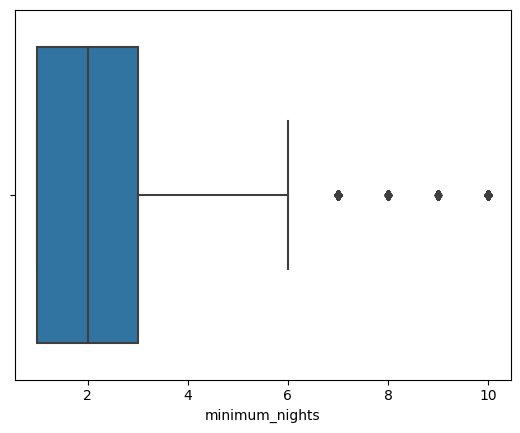

In [49]:
sns.boxplot(x = df['minimum_nights'])
plt.show()

now we have reduced outliers significantly

analysing availability_365

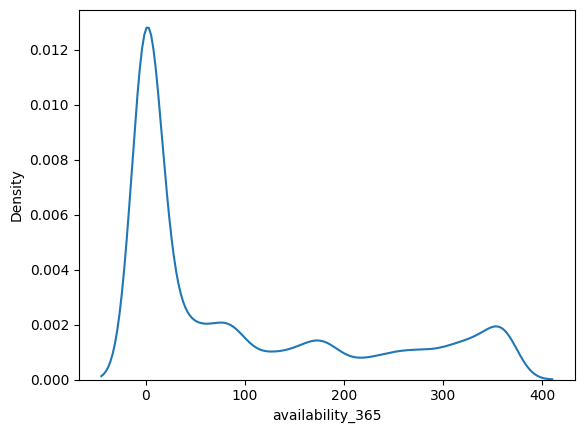

In [50]:
sns.kdeplot(data = df, x = 'availability_365')
plt.show()

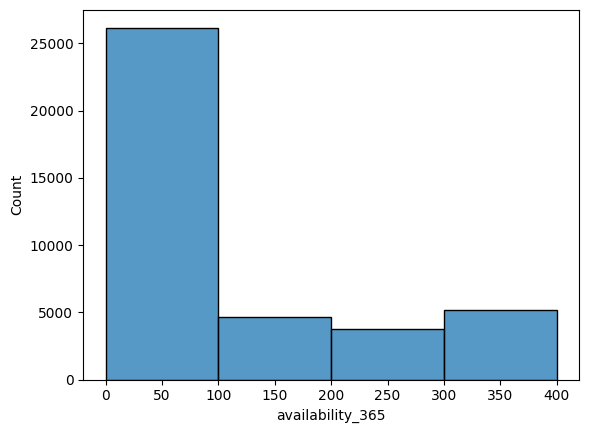

In [51]:
sns.histplot(data = df, x = 'availability_365', bins = [0, 100, 200, 300, 400])
plt.show()

I think we should replcae all the recods having availability_365 > 365 with 365

Observation <br>
most listigns are available fro 0-100 days for booking

In [52]:
df['availability_365'].nunique()

366

Observation <br>
most rooms are available

In [53]:
df['availability_365'].min()

0

There are some listings which will not be available for booking next year

In [54]:
df[df['availability_365'] == 0]['id'].count()

15670

15670 listings are not avaliable for any booking next year

In [55]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


analysing reviews <br>


In [56]:
df['number_of_reviews'].sort_values(ascending = False).head(10)

11759    629
2031     607
2030     597
2015     594
13495    576
10623    543
1879     540
20403    510
4870     488
471      480
Name: number_of_reviews, dtype: int64

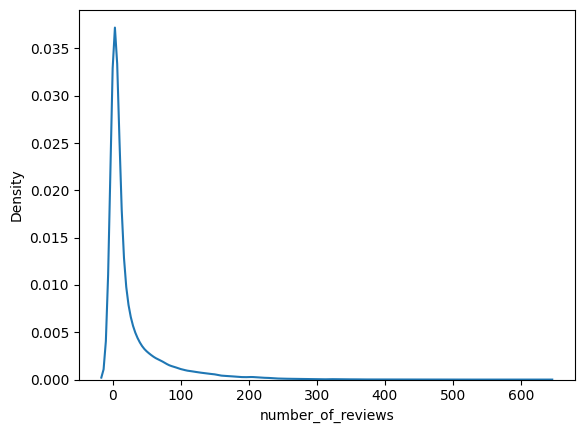

In [57]:
sns.kdeplot(df['number_of_reviews'])
plt.show()

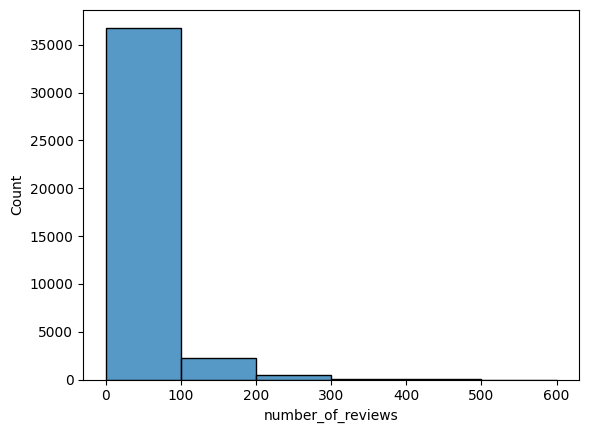

In [58]:
sns.histplot(df['number_of_reviews'], bins = [0, 100, 200, 300, 400, 500, 600])
plt.show()

Observation <br>
most listings are having number of revies between 0-100

In [59]:
r7 = df.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index()
r7.columns = ['neighbourhood', 'avg_number_of_reviews']

In [60]:
r7

,neighbourhood,avg_number_of_reviews
0,Bronx,27.495050
1,Brooklyn,26.208711
2,Manhattan,25.201776
3,Queens,30.115423
4,Staten Island,32.921512


let's study correlation

In [61]:
corr = df.corr()

In [62]:
corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.576867,-0.009387,0.113636,-0.025454,-0.089560,-0.327743,0.205028,0.091964,0.075075
host_id,0.576867,1.000000,0.018131,0.159072,-0.033215,-0.145461,-0.137115,0.229561,0.143214,0.207082
latitude,-0.009387,0.018131,1.000000,0.097997,0.054984,-0.014071,-0.005298,-0.008184,-0.017454,-0.042442
longitude,0.113636,0.159072,0.097997,1.000000,-0.291392,-0.097294,0.043684,0.131543,-0.063927,0.149609
price,-0.025454,-0.033215,0.054984,-0.291392,1.000000,0.060406,-0.024607,-0.043231,0.088779,0.027082
minimum_nights,-0.089560,-0.145461,-0.014071,-0.097294,0.060406,1.000000,-0.127650,-0.231784,-0.031193,-0.097638
number_of_reviews,-0.327743,-0.137115,-0.005298,0.043684,-0.024607,-0.127650,1.000000,0.582481,-0.020463,0.250456
reviews_per_month,0.205028,0.229561,-0.008184,0.131543,-0.043231,-0.231784,0.582481,1.000000,0.036417,0.254354
calculated_host_listings_count,0.091964,0.143214,-0.017454,-0.063927,0.088779,-0.031193,-0.020463,0.036417,1.000000,0.129630
availability_365,0.075075,0.207082,-0.042442,0.149609,0.027082,-0.097638,0.250456,0.254354,0.129630,1.000000


In [63]:
num_cols

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [64]:
corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.576867,-0.009387,0.113636,-0.025454,-0.089560,-0.327743,0.205028,0.091964,0.075075
host_id,0.576867,1.000000,0.018131,0.159072,-0.033215,-0.145461,-0.137115,0.229561,0.143214,0.207082
latitude,-0.009387,0.018131,1.000000,0.097997,0.054984,-0.014071,-0.005298,-0.008184,-0.017454,-0.042442
longitude,0.113636,0.159072,0.097997,1.000000,-0.291392,-0.097294,0.043684,0.131543,-0.063927,0.149609
price,-0.025454,-0.033215,0.054984,-0.291392,1.000000,0.060406,-0.024607,-0.043231,0.088779,0.027082
minimum_nights,-0.089560,-0.145461,-0.014071,-0.097294,0.060406,1.000000,-0.127650,-0.231784,-0.031193,-0.097638
number_of_reviews,-0.327743,-0.137115,-0.005298,0.043684,-0.024607,-0.127650,1.000000,0.582481,-0.020463,0.250456
reviews_per_month,0.205028,0.229561,-0.008184,0.131543,-0.043231,-0.231784,0.582481,1.000000,0.036417,0.254354
calculated_host_listings_count,0.091964,0.143214,-0.017454,-0.063927,0.088779,-0.031193,-0.020463,0.036417,1.000000,0.129630
availability_365,0.075075,0.207082,-0.042442,0.149609,0.027082,-0.097638,0.250456,0.254354,0.129630,1.000000


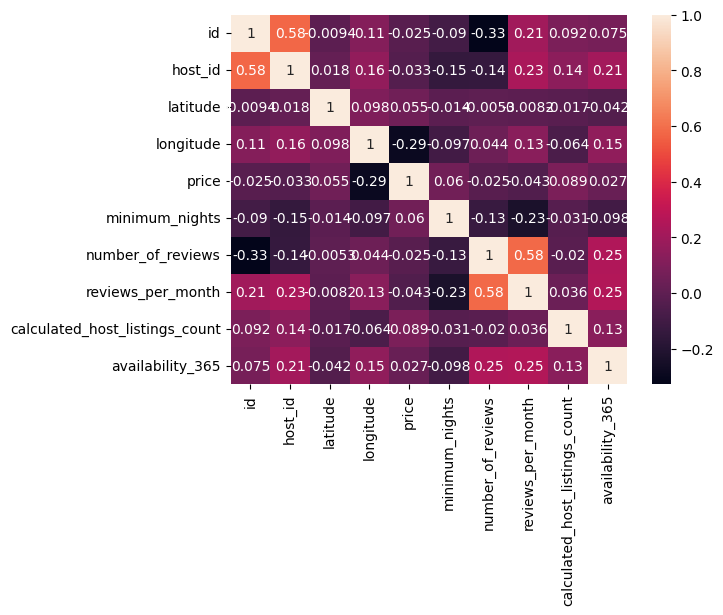

In [65]:
sns.heatmap(corr, annot = True)
plt.show()